<a href="https://colab.research.google.com/github/LeQuXi/numerical-methods-secant-chord-false-position-/blob/main/Spline_interpolation_(given_nodes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task1**

#X=np.array([-1.8,-1.65,-1.50, -1.17,-0.82, -0.39,0,0.62,1,1.96,2.20,2.34,2.49,2.74])
#Y=np.array([0,-0.25,-0.30,-0.65,0,0.97,0.66,0,-0.38,-1.28,-0.95,-0.50,0,0.34])
#X=np.array([-1.8,-1.50, -1.17,-0.82, -0.39,0,0.62,1,1.96,2.20,2.34,2.49,2.74])
#Y=np.array([0,-0.30,-0.65,0,0.97,0.66,0,-0.38,-1.28,-0.95,-0.50,0,0.34])

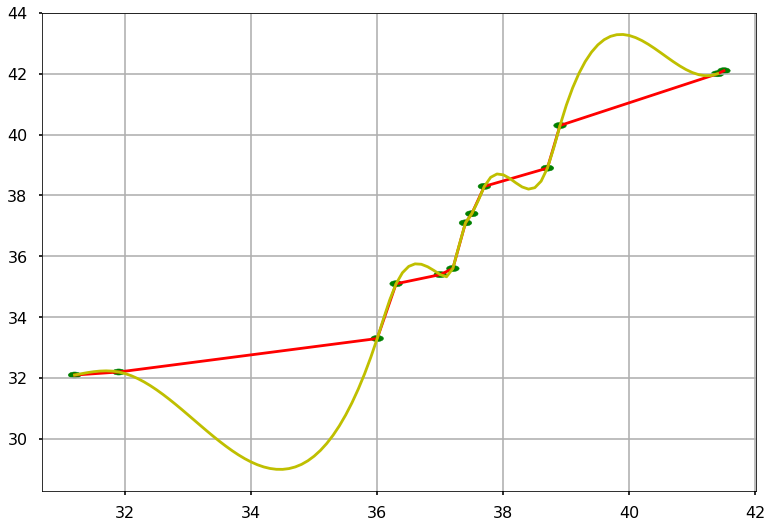

In [ ]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

def getNaturalKs(xs, ys):
    n = len(xs) - 1
    A = np.zeros((n+1, n+2))

    for i in range(1, n):
        A[i][i - 1] = 1 / (xs[i] - xs[i - 1])
        A[i][i] = 2 * (1 / (xs[i] - xs[i - 1]) + 1 / (xs[i + 1] - xs[i]))
        A[i][i + 1] = 1 / (xs[i + 1] - xs[i])
        A[i][n + 1] = 3*((ys[i] - ys[i - 1])/((xs[i] - xs[i - 1])**2)+(ys[i + 1]-ys[i])/((xs[i + 1] - xs[i])**2))

    A[0][0] = 2 / (xs[1] - xs[0])
    A[0][1] = 1 / (xs[1] - xs[0])
    A[0][n + 1] = 3 * (ys[1] - ys[0]) / ((xs[1] - xs[0])**2)

    A[n][n - 1] = 1 / (xs[n] - xs[n - 1])
    A[n][n] = 2 / (xs[n] - xs[n - 1])
    A[n][n + 1] = 3 * (ys[n] - ys[n - 1]) / ((xs[n] - xs[n - 1])**2)

    ks = np.linalg.solve(A[:, :n+1], A[:,n+1])
    return ks

def evalSpline(x, xs, ys, ks):
    i = 1
    while (xs[i] < x): i+=1
    t = (x - xs[i - 1]) / (xs[i] - xs[i - 1])
    a = ks[i - 1] * (xs[i] - xs[i - 1]) - (ys[i] - ys[i - 1])
    b = -ks[i] * (xs[i] - xs[i - 1]) + (ys[i] - ys[i - 1])
    q = (1 - t) * ys[i - 1] + t * ys[i] + t * (1 - t) * (a * (1 - t) + b * t)
    return q

if __name__ == '__main__':
    X = []
    Y = []
    xs = np.sort([36.3,31.9,41.4,38.9,38.7,36.0,31.2,41.5,37.0,37.4,37.7,37.2,37.5 ])
    ys = np.sort([37.4,35.6,37.1,40.3,35.1,38.9,32.2,33.3,38.3,42.1,42.0,35.4,32.1])
    #xs = [12.46,18.06,18.8,24.26]
    #ys = [3,4,2,1]

    ks = getNaturalKs(xs, ys)
    for x in np.arange(min(xs), max(xs), 0.1):
        X.append(x)
        Y.append(evalSpline(x, xs, ys, ks))
        

    for i in range(len(xs)):
        circle = plt.Circle((xs[i], ys[i]), radius=0.1, color='g')
        plt.gcf().gca().add_artist(circle)

    plt.plot(xs,ys, "r-")
    plt.plot(X,Y, "y")
    plt.grid()
    plt.show()

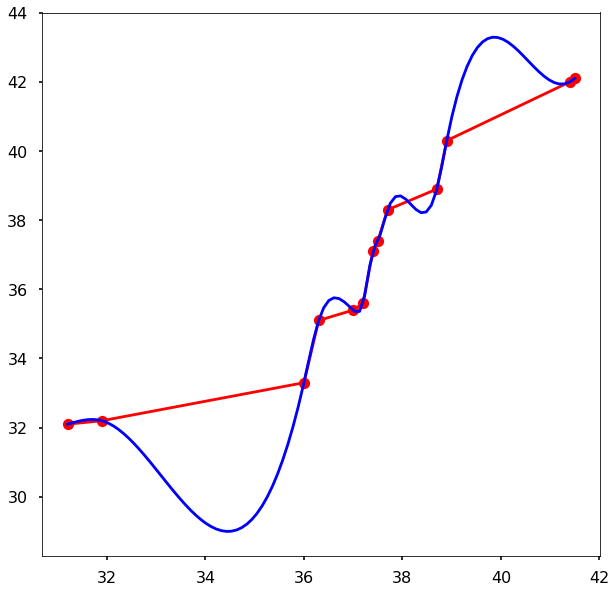

In [ ]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
x = np.sort([36.3,31.9,41.4,38.9,38.7,36.0,31.2,41.5,37.0,37.4,37.7,37.2,37.5])
y = np.sort([37.4,35.6,37.1,40.3,35.1,38.9,32.2,33.3,38.3,42.1,42.0,35.4,32.1])
#x = [12.46,18.06,18.8,24.26]
#y = [3,4,2,1]
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(max(x), min(x), 100)
y_new = f(x_new)
plt.figure(figsize = (10,10))
plt.plot(x, y, 'ro-')
plt.plot(x_new, y_new, 'b')

plt.show()


[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[ 1.   -1.17  0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.  ]]
[[ 1.     -1.17    1.3689  0.    ]
 [ 0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.    ]]
[[ 1.       -1.17      1.3689   -1.601613]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]]
[[ 1.       -1.17      1.3689   -1.601613]
 [ 1.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]]
[[ 1.       -1.17      1.3689   -1.601613]
 [ 1.       -0.39      0.        0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      ]]
[[ 1.       -1.17      1.3689   -1.601613]
 [ 1.       -0.39      0.1521    0.      ]
 [ 0.        0.        0.        0.      ]
 [ 0.        0.        0.        0.      

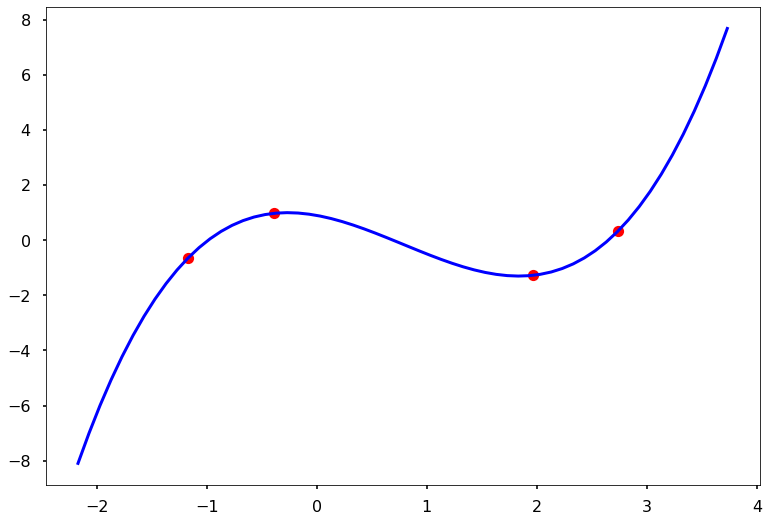

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
X= np.array([ -1.17,  -0.39,   1.96, 2.74])
Y = np.array([ -0.65,  0.97,  -1.28,  0.34])
plt.plot(X,Y, 'ro')
n= len(X)
BaseMatrix = np.zeros((n,n))
#print(BaseMatrix)
for i in range(n):
  for j in range(n):
    BaseMatrix[i,j] = X[i]**j
    print(BaseMatrix)
coefs = np.linalg.solve(BaseMatrix, Y)
xxx = np.arange(min(X)-1, max(X)+1, 0.1)
yyy = np.zeros_like(xxx)
print(yyy)
for i in range(n):
    yyy += coefs[i]*xxx**i
    print(yyy)
plt.plot(xxx, yyy, 'b-', linewidth = 3)
plt.show()

